In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing_data = load_housing_data()

In [3]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing_data.dropna(inplace=True)
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
from sklearn.model_selection import train_test_split
X = housing_data.drop(["median_house_value"],axis = 1)
y = housing_data['median_house_value']

In [7]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [8]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [10]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18766,-118.30,34.00,52.0,1420.0,355.0,1080.0,353.0,1.5179,<1H OCEAN,116100.0
2272,-121.86,37.32,13.0,2519.0,581.0,2094.0,530.0,4.3621,<1H OCEAN,173400.0
13824,-121.43,38.56,41.0,1105.0,227.0,443.0,210.0,3.1827,INLAND,131700.0
660,-117.27,33.06,7.0,3686.0,733.0,1612.0,672.0,3.1970,NEAR OCEAN,367100.0
17926,-118.14,34.01,36.0,702.0,210.0,834.0,216.0,2.2500,<1H OCEAN,162500.0
...,...,...,...,...,...,...,...,...,...,...
16572,-117.97,33.68,23.0,1722.0,316.0,865.0,309.0,4.6452,<1H OCEAN,273800.0
9013,-117.25,32.72,36.0,2632.0,450.0,2038.0,419.0,6.5319,NEAR OCEAN,345800.0
6784,-118.36,33.88,26.0,1375.0,286.0,829.0,278.0,3.9844,<1H OCEAN,230700.0
1770,-118.32,34.02,50.0,1655.0,256.0,672.0,260.0,4.2554,<1H OCEAN,194300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

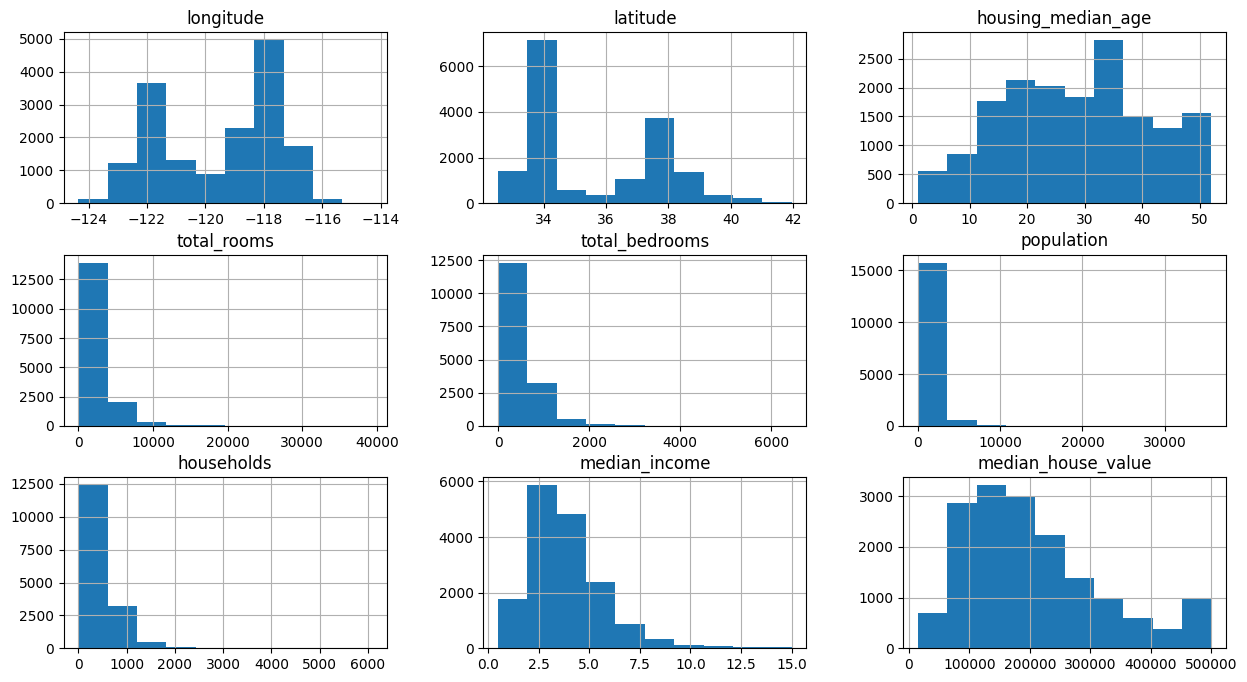

In [11]:
train_data.hist(figsize=(15,8))

In [12]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

In [13]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'],axis= 1)

In [14]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18766,-118.30,34.00,52.0,7.259116,5.874931,6.985642,5.869297,1.5179,116100.0,True,False,False,False,False
2272,-121.86,37.32,13.0,7.832014,6.366470,7.647309,6.274762,4.3621,173400.0,True,False,False,False,False
13824,-121.43,38.56,41.0,7.008505,5.429346,6.095825,5.351858,3.1827,131700.0,False,True,False,False,False
660,-117.27,33.06,7.0,8.212568,6.598509,7.385851,6.511745,3.1970,367100.0,False,False,False,False,True
17926,-118.14,34.01,36.0,6.555357,5.351858,6.727432,5.379897,2.2500,162500.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16572,-117.97,33.68,23.0,7.451822,5.758902,6.763885,5.736572,4.6452,273800.0,True,False,False,False,False
9013,-117.25,32.72,36.0,7.875879,6.111467,7.620215,6.040255,6.5319,345800.0,False,False,False,False,True
6784,-118.36,33.88,26.0,7.226936,5.659482,6.721426,5.631212,3.9844,230700.0,True,False,False,False,False
1770,-118.32,34.02,50.0,7.412160,5.549076,6.511745,5.564520,4.2554,194300.0,True,False,False,False,False


<Axes: >

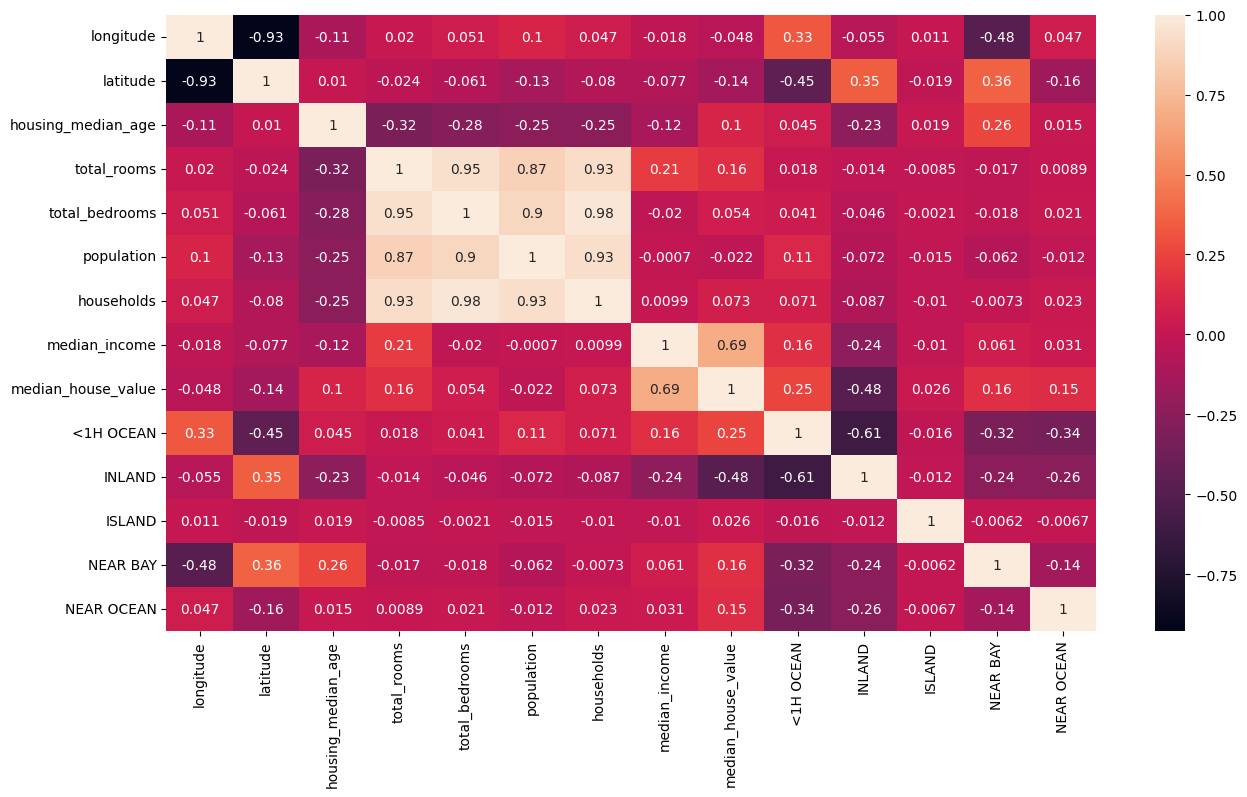

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True)

<Axes: xlabel='latitude', ylabel='longitude'>

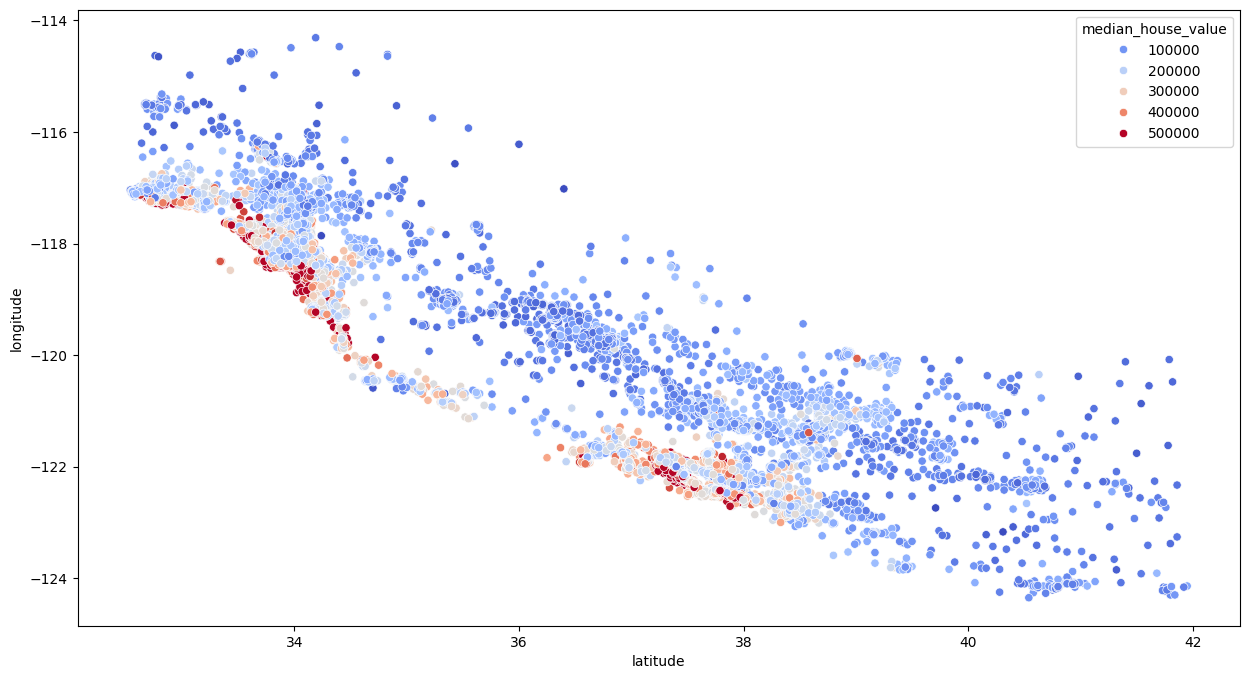

In [16]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [17]:
train_data['bedrooms_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

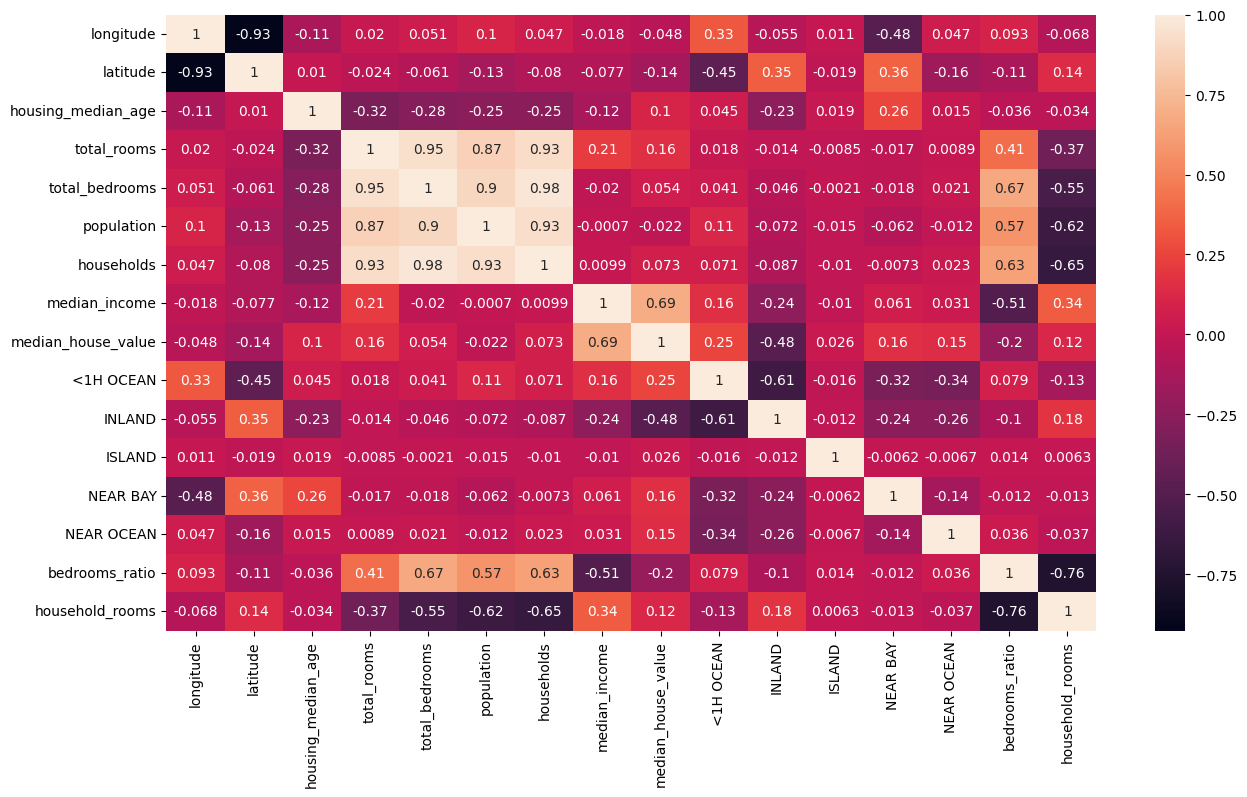

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train, y_train = train_data.drop(['median_house_value'],axis=1) , train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_train_s,y_train)

C:\Users\vinuth gowda s\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vinuth gowda s\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vinuth gowda s\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vinuth gowda s\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_spar

LinearRegression()

In [20]:
test_data = X_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop(['ocean_proximity'],axis= 1)

test_data['bedrooms_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_s,y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test_s,y_test)

0.8074439123904529

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
forest = RandomForestRegressor()
param_grid = {
    "n_estimators":[3,10,30],
    "max_features":[2,4,6,8]
}
random_search = RandomizedSearchCV(forest,cv = 3,param_distributions=param_grid,scoring="neg_mean_squared_error",return_train_score=True)
random_search.fit(X_train_s,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': [2, 4, 6, 8],
                                        'n_estimators': [3, 10, 30]},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_forest = random_search.best_estimator_

In [ ]:
random_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [ ]:
best_forest.score(X_test_s,y_test)

0.7969945398207926

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
forest = RandomForestRegressor()
param_grid = {
    "n_estimators":[100,200,300],
    "max_features":[2,4],
    "max_depth":[None,4,8]
}
random_search = RandomizedSearchCV(forest,cv = 5,param_distributions=param_grid,scoring="neg_mean_squared_error",return_train_score=True)
random_search.fit(X_train_s,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 4, 8],
                                        'max_features': [2, 4],
                                        'n_estimators': [100, 200, 300]},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
random_search.best_estimator_.score(X_test_s,y_test)

0.7991912244947145

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("scaler",scaler),
                     ('selector', SelectFromModel(RandomForestRegressor(random_state=42),threshold=0.005)),
                     ("random_forest",best_forest)])
pipeline.fit(X_train_s,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=42),
                                 threshold=0.005)),
                ('random_forest',
                 RandomForestRegressor(max_features=6, n_estimators=30))])

In [ ]:
pipeline.score(X_test_s,y_test)

0.8024259616492726